In [1]:
import random

def flip(numFlips):
    heads = 0
    for flip in range(numFlips):
        if random.choice(["H", "T"]) == "H":
            heads += 1
    return heads / numFlips

def flipSim(numFlipsPerTrial, numTrials):
    p_list = []
    for trial in range(numTrials):
        p_list.append(flip(numFlipsPerTrial))
    mean = sum(p_list) / len(p_list)
    return mean

In [10]:
flipSim(100, 100)

0.49750000000000016

In [11]:
# Gaussian PDF and its integrals
import math
import scipy.integrate

def gaussian(x, mu, sigma):
    factor1 = 1/((2*math.pi)**0.5 * sigma)
    factor2 = math.exp(-1 * (x-mu)**2 / (2 * sigma**2))
    return factor1 * factor2

# Checks if the 68-95-99.7 rule (empirical rule) is true
def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print("For mu =", mu, "and sigma =", sigma)
        for numStd in (1, 2, 3):
            area = scipy.integrate.quad(gaussian, mu - numStd*sigma, mu + numStd*sigma, (mu, sigma))[0]
            print("  Fraction within", numStd, "std =", round(area, 4))

checkEmpirical(3)


For mu = -6 and sigma = 6
  Fraction within 1 std = 0.6827
  Fraction within 2 std = 0.9545
  Fraction within 3 std = 0.9973
For mu = -3 and sigma = 9
  Fraction within 1 std = 0.6827
  Fraction within 2 std = 0.9545
  Fraction within 3 std = 0.9973
For mu = 3 and sigma = 9
  Fraction within 1 std = 0.6827
  Fraction within 2 std = 0.9545
  Fraction within 3 std = 0.9973


Finger exercise: Implement a function that calculates the probability of rolling exactly two $3$'s in $k$ rolls of a fair die. Use this function to plot the probability as $k$ varies from $2$ to $200$

In [12]:
def fact(n):
    """Calculates n! with recursion
    Args:
        n (int): n >= 0
    """
    if n == 0 or n == 1:
        return 1
    else:
        return n * fact(n-1)

def p_twoThrees(k):
    p = 1/6
    factor1 = fact(k) / (fact(k - 2) * fact(2))
    factor2 = p**2 * (1-p)**(k-2)
    return factor1 * factor2

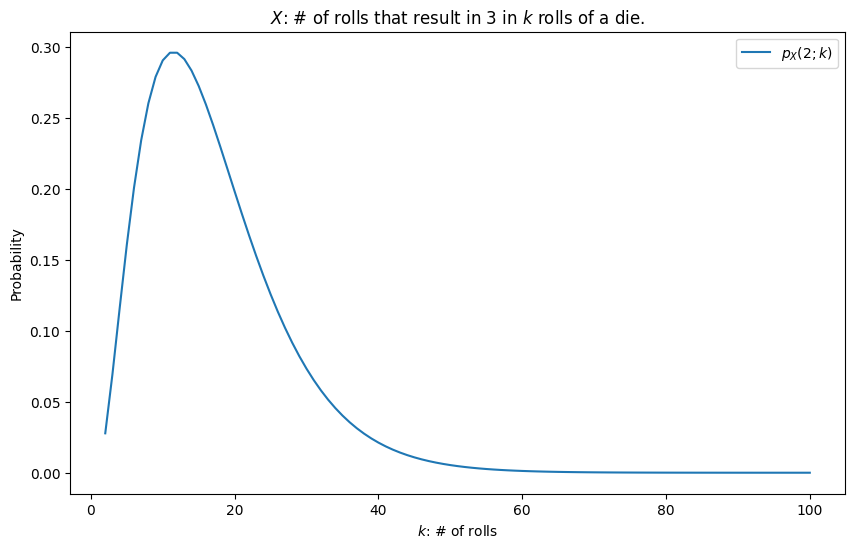

In [17]:
from matplotlib import pyplot as plt

k_list = [k for k in range(2, 101)]
p_list = [p_twoThrees(k) for k in range(2, 101)]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_list, p_list, label="$p_X(2; k)$")
ax.set(xlabel="$k$: # of rolls", ylabel="Probability", title="$X$: # of rolls that result in $3$ in $k$ rolls of a die.")
ax.legend()
